In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os 
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize

In [2]:
dirtrain= "chest_xray/chest_xray/train/"  
dirtest=  "chest_xray/chest_xray/test/"   

In [3]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [4]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

import h5py
from keras .utils.np_utils import to_categorical
NUM_CLASSES=2
IMAGE_DIMS=(150,150,3)
file_name="X_train.h5"
try:
    with h5py.File(file_name) as hf:
        X_train,y_train=hf["imgs"][:],hf["labels"][:]
    print ("loaded image from {}".format(file_name))
except(IOError,OSError,KeyError):
    print("Error in reading {} . Processing all images..." .format(file_name))
    X_train,y_train=get_data(dirtrain)
    y_train=to_categorical(y_train,NUM_CLASSES)
    with h5py.File(file_name,"w") as hf:
        hf.create_dataset("imgs",data=X_train)
        hf.create_dataset("labels",data=y_train)
        
        NUM_CLASSES=2
IMAGE_DIMS=(150,150,3)
file_name="X_test.h5"
try:
    with h5py.File(file_name) as hf:
        X_test,y_test=hf["imgs"][:],hf["labels"][:]
    print ("loaded image from {}".format(file_name))
except(IOError,OSError,KeyError):
    print("Error in reading {} . Processing all images..." .format(file_name))
    X_test,y_test=get_data(dirtest)
    y_test=to_categorical(y_test,NUM_CLASSES)
    with h5py.File(file_name,"w") as hf:
        hf.create_dataset("imgs",data=X_test)
        hf.create_dataset("labels",data=y_test)

Using TensorFlow backend.
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

loaded image from X_train.h5


D:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:49: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


loaded image from X_test.h5


In [5]:
X_train,y_train

(array([[[[0.08235294, 0.08235294, 0.08235294],
          [0.07058824, 0.07058824, 0.07058824],
          [0.0662658 , 0.0662658 , 0.0662658 ],
          ...,
          [0.36470588, 0.36470588, 0.36470588],
          [0.36470588, 0.36470588, 0.36470588],
          [0.36862745, 0.36862745, 0.36862745]],
 
         [[0.08235294, 0.08235294, 0.08235294],
          [0.0745098 , 0.0745098 , 0.0745098 ],
          [0.06666667, 0.06666667, 0.06666667],
          ...,
          [0.36078431, 0.36078431, 0.36078431],
          [0.36439216, 0.36439216, 0.36439216],
          [0.36246797, 0.36246797, 0.36246797]],
 
         [[0.08052288, 0.08052288, 0.08052288],
          [0.0745098 , 0.0745098 , 0.0745098 ],
          [0.06666667, 0.06666667, 0.06666667],
          ...,
          [0.36078431, 0.36078431, 0.36078431],
          [0.35686275, 0.35686275, 0.35686275],
          [0.35294118, 0.35294118, 0.35294118]],
 
         ...,
 
         [[0.10980392, 0.10980392, 0.10980392],
          [0.10588

In [6]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [7]:
print(y_train.shape,'\n',y_test.shape)

(5216, 2) 
 (624, 2)


In [8]:
Pimg = os.listdir(dirtrain + "PNEUMONIA")
Nimg = os.listdir(dirtrain + "NORMAL")

(Left) - No Pneumonia ----- (Right) - Pneumonia


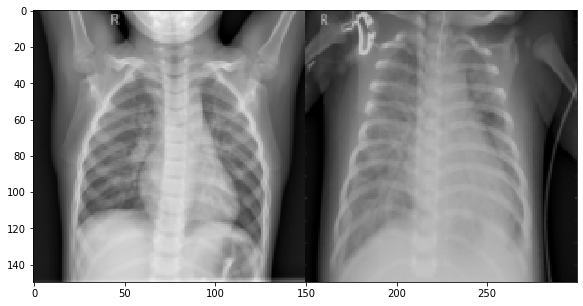

(Left) - No Pneumonia ----- (Right) - Pneumonia


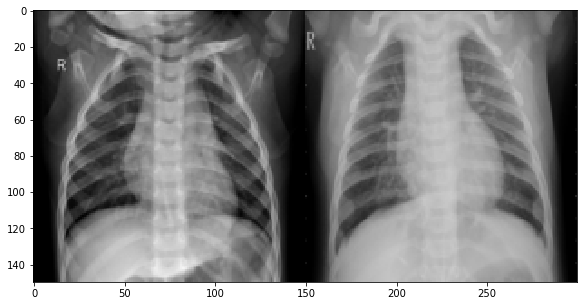

(Left) - No Pneumonia ----- (Right) - Pneumonia


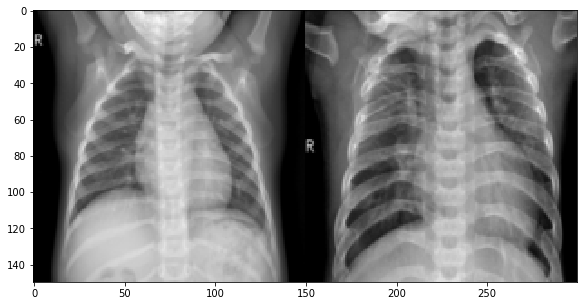

(Left) - No Pneumonia ----- (Right) - Pneumonia


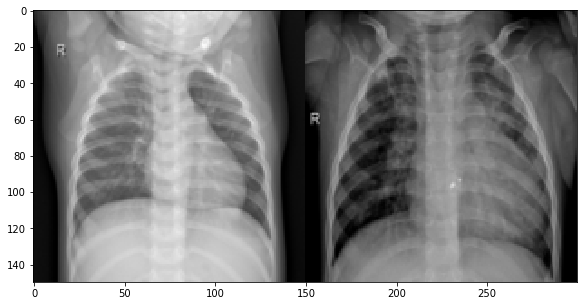

(Left) - No Pneumonia ----- (Right) - Pneumonia


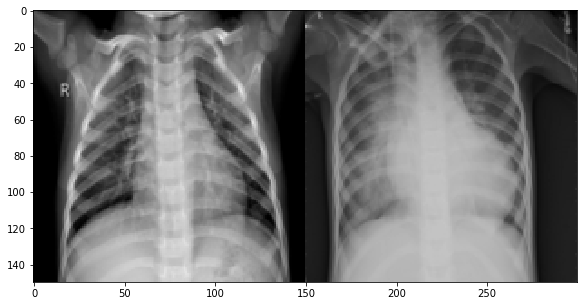

(Left) - No Pneumonia ----- (Right) - Pneumonia


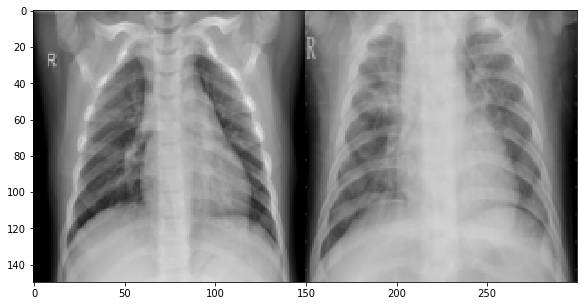

(Left) - No Pneumonia ----- (Right) - Pneumonia


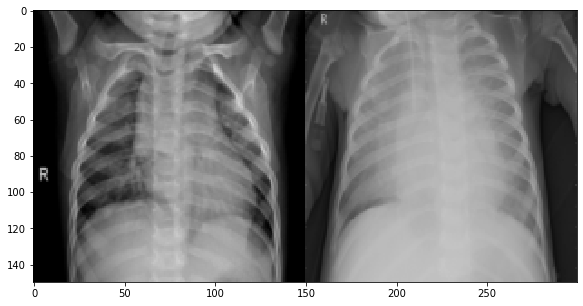

(Left) - No Pneumonia ----- (Right) - Pneumonia


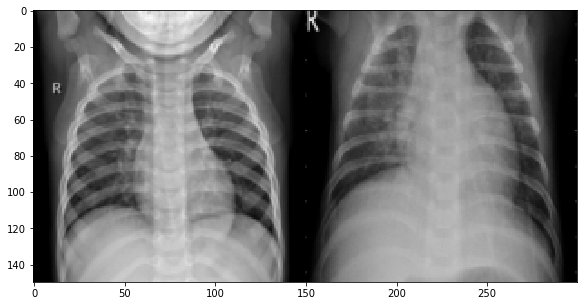

(Left) - No Pneumonia ----- (Right) - Pneumonia


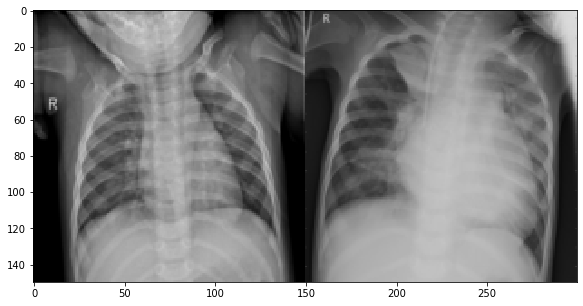

In [9]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(dirtrain+"PNEUMONIA/"+Pimg[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150,3) , mode = 'reflect')
    imagen1 = cv2.imread(dirtrain+"NORMAL/"+Nimg[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150,3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia ----- (Right) - Pneumonia")
    
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(1,10):
    plotter(i)

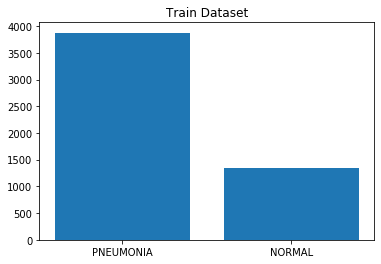

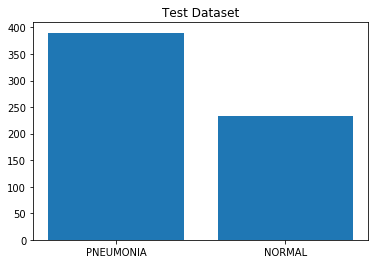

In [10]:
import matplotlib.pyplot as plt
plt.bar(["PNEUMONIA","NORMAL"],[len(Pimg),len(Nimg)])
plt.title("Train Dataset")
plt.show()
Pimg_test=os.listdir(dirtest+"PNEUMONIA")
Nimg_test=os.listdir(dirtest+"NORMAL")
plt.bar(["PNEUMONIA","NORMAL"],[len(Pimg_test),len(Nimg_test)])
plt.title("Test Dataset")
plt.show()

In [11]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [12]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
import keras.backend.common as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [13]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

In [14]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(32, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(64, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))


model.add(Conv2D(96, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))

model.add(Conv2D(128, (3, 3), padding="same", input_shape=(3,150,150)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding ="same"))

model.add(Flatten())

model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 150, 16)        21616     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 150, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 3, 150, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 150, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 150, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 3, 150, 16)        0         
_________________________

In [15]:
batch_size = 256
epochs = 8
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)


Train on 5216 samples, validate on 624 samples
Epoch 1/8
5216/5216 [==============================] - 59s 11ms/step - loss: 0.4517 - accuracy: 0.7918 - val_loss: 0.6598 - val_accuracy: 0.6250
Epoch 2/8


D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
D:\Users\admin\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


5216/5216 [==============================] - 54s 10ms/step - loss: 0.2387 - accuracy: 0.9190 - val_loss: 0.9668 - val_accuracy: 0.6250
Epoch 3/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.1769 - accuracy: 0.9440 - val_loss: 0.7294 - val_accuracy: 0.7115
Epoch 4/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.1489 - accuracy: 0.9558 - val_loss: 0.6282 - val_accuracy: 0.7676
Epoch 5/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.1273 - accuracy: 0.9648 - val_loss: 0.6282 - val_accuracy: 0.7580
Epoch 6/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.1126 - accuracy: 0.9685 - val_loss: 0.9893 - val_accuracy: 0.6867
Epoch 7/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.0982 - accuracy: 0.9745 - val_loss: 0.6543 - val_accuracy: 0.7684
Epoch 8/8
5216/5216 [==============================] - 53s 10ms/step - loss: 0.0892 - accuracy: 0.9763 - val_loss: 0.5622 - val_accuracy: 0.

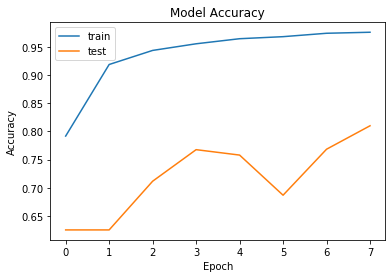

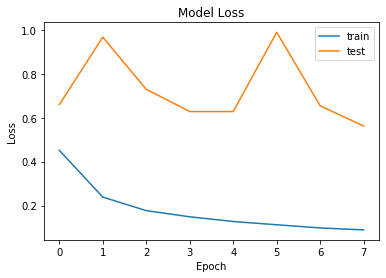

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

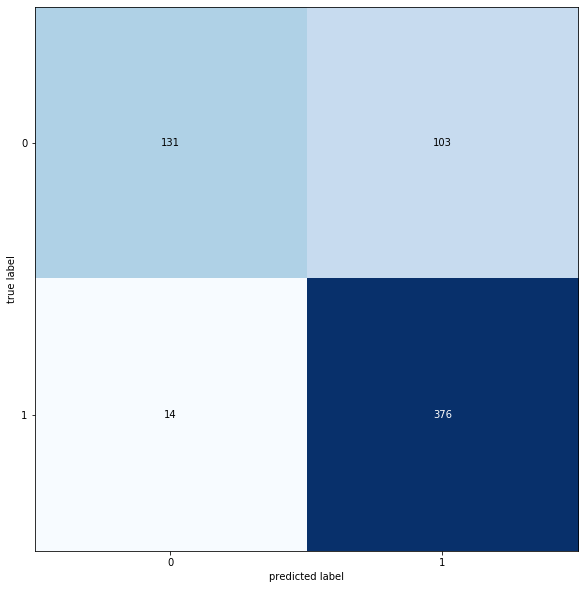

In [17]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 10))
plt.show()